In [36]:
import cv2
import pytesseract
import fastwer
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display

In [4]:
# PREPROCESSING IMAGES 

import numpy as np
import cv2

def preprocess_image(img):
    # Rescale the image, if needed.
    img = np.array(img)
    img = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)
    # Convert to gray
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply dilation and erosion to remove some noise
    kernel = np.ones((1, 1), np.uint8)
    img = cv2.dilate(img, kernel, iterations=1)
    img = cv2.erode(img, kernel, iterations=1)
    # Apply blur to smooth out the edges
    img = cv2.GaussianBlur(img, (5, 5), 0)
    # Apply threshold to get image with only b&w (binarization)
    img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    return img

In [56]:
# TESSERACT MAIN 

# Tesseract

# Convert document from pdf to image https://stackoverflow.com/questions/29657237/tesseract-ocr-pdf-as-input
import cv2
import pdf2image
import numpy as np
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract


def pdf_to_img(pdf_file, FIRST_PAGE, LAST_PAGE):
    return pdf2image.convert_from_path(pdf_file, first_page= FIRST_PAGE, last_page=LAST_PAGE)

def ocr_core(file):
    pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'
    text = pytesseract.image_to_string(file, lang='spa')
    return text


def print_pages(pdf_file):
    images = pdf_to_img(pdf_file, first_page = 20, last_page = 21)
    for pg, img in enumerate(images):
        #img = preprocess_image(img)
        #display(img)
        text = ocr_core(img)
        print('next')


In [47]:
# book_path = 'C:/Users/Hp/OneDrive/Escritorio/libro_1.pdf'
# print_pages(book_path)

In [32]:
# Show the sample images that we will work on (Need to create a folder to upload sample images in Colab environment)
txt_testing = os.listdir('C:/Users/Hp/PycharmProjects/ImageToTextArgentina/data')
txt_testing = sorted(txt_testing)
txt_testing = [doc for doc in txt_testing if '.txt' in doc] 

['libro_1_sample.txt', 'libro_2_sample.txt', 'libro_3_sample.txt']

In [33]:
pdf_list = os.listdir('C:/Users/Hp/PycharmProjects/ImageToTextArgentina/data')
pdf_list = sorted(pdf_list)
pdf_list = [doc for doc in pdf_list if '.pdf' in doc] 

In [37]:
pdf_list

['libro_1.pdf', 'libro_2.pdf', 'libro_3.pdf']

In [74]:
pdf_dict = {
'libro_1.pdf': {'first_page': 20, 'last_page': 21},
'libro_2.pdf': {'first_page': 1, 'last_page': 2},
'libro_3.pdf': {'first_page': 20, 'last_page': 21}
}

In [46]:
for ele in pdf_dict: 
    first_page = pdf_dict[ele]['first_page']
    second_page = pdf_dict[ele]['last_page']
    

20
21
519
520
20
21


In [11]:
# Create empty dataframe to store output
df_output = pd.DataFrame(columns = ['txt_filename', 'ocr_output'])

In [35]:
df_output

,img_filename,ocr_output


In [58]:
for num, pdf in enumerate(pdf_list):
    first_page = pdf_dict[pdf]['first_page']
    last_page = pdf_dict[pdf]['last_page']
    images = pdf_to_img('C:/Users/Hp/PycharmProjects/ImageToTextArgentina/data/' + pdf, first_page, last_page)
    for pg, img in enumerate(images):
        #img = preprocess_image(img)
        #display(img)
        text = ocr_core(img)
        print(pdf)
        print(img)
        print(text)
    

libro_1.pdf
<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1039x1748 at 0x16E46CCB730>
do con la importancia de la obra. Al principio, presenta siem-
pre una bibliografía de las ediciones en alemán y de sus
traducciones al inglés.* (No se da cuenta de Jas traducciones
a otras lenguas, ni se ha intentado ofrecer una lista com-
pleta de las reimpresiones posteriores a la muerte de Freud,
en 1939.)** A ello sigue el relato de lo que se conoce acerca
de la fecha y circunstancias de redacción y publicación de
la obra. Luego se brinda alguna indicación sobre el tema de
que se ocupa y la ubicación de la obra dentro del pensamien-
to fundamental de Freud. En este aspecto, por supuesto, los
comentarios difieren en cuanto a su extensión: en el caso
de un trabajo breve de escaso interés sólo comprenden una
o dos otaciones, mientras que para las obras principales
pueden abarcar varías páginas.

Todos estos diversos típos de intervención del editor han
estado gobernados por un principio único

In [ ]:
for num, pdf in enumerate(pdf_list):
    first_page = pdf_dict[pdf]['first_page']
    last_page = pdf_dict[pdf]['last_page']
    images = pdf_to_img('C:/Users/Hp/PycharmProjects/ImageToTextArgentina/data/' + pdf, first_page, last_page)
    for pg, img in enumerate(images):
        #img = preprocess_image(img)
        #display(img)
        text = ocr_core(img)
        print(pdf)
        print(img)
        print(text)
    

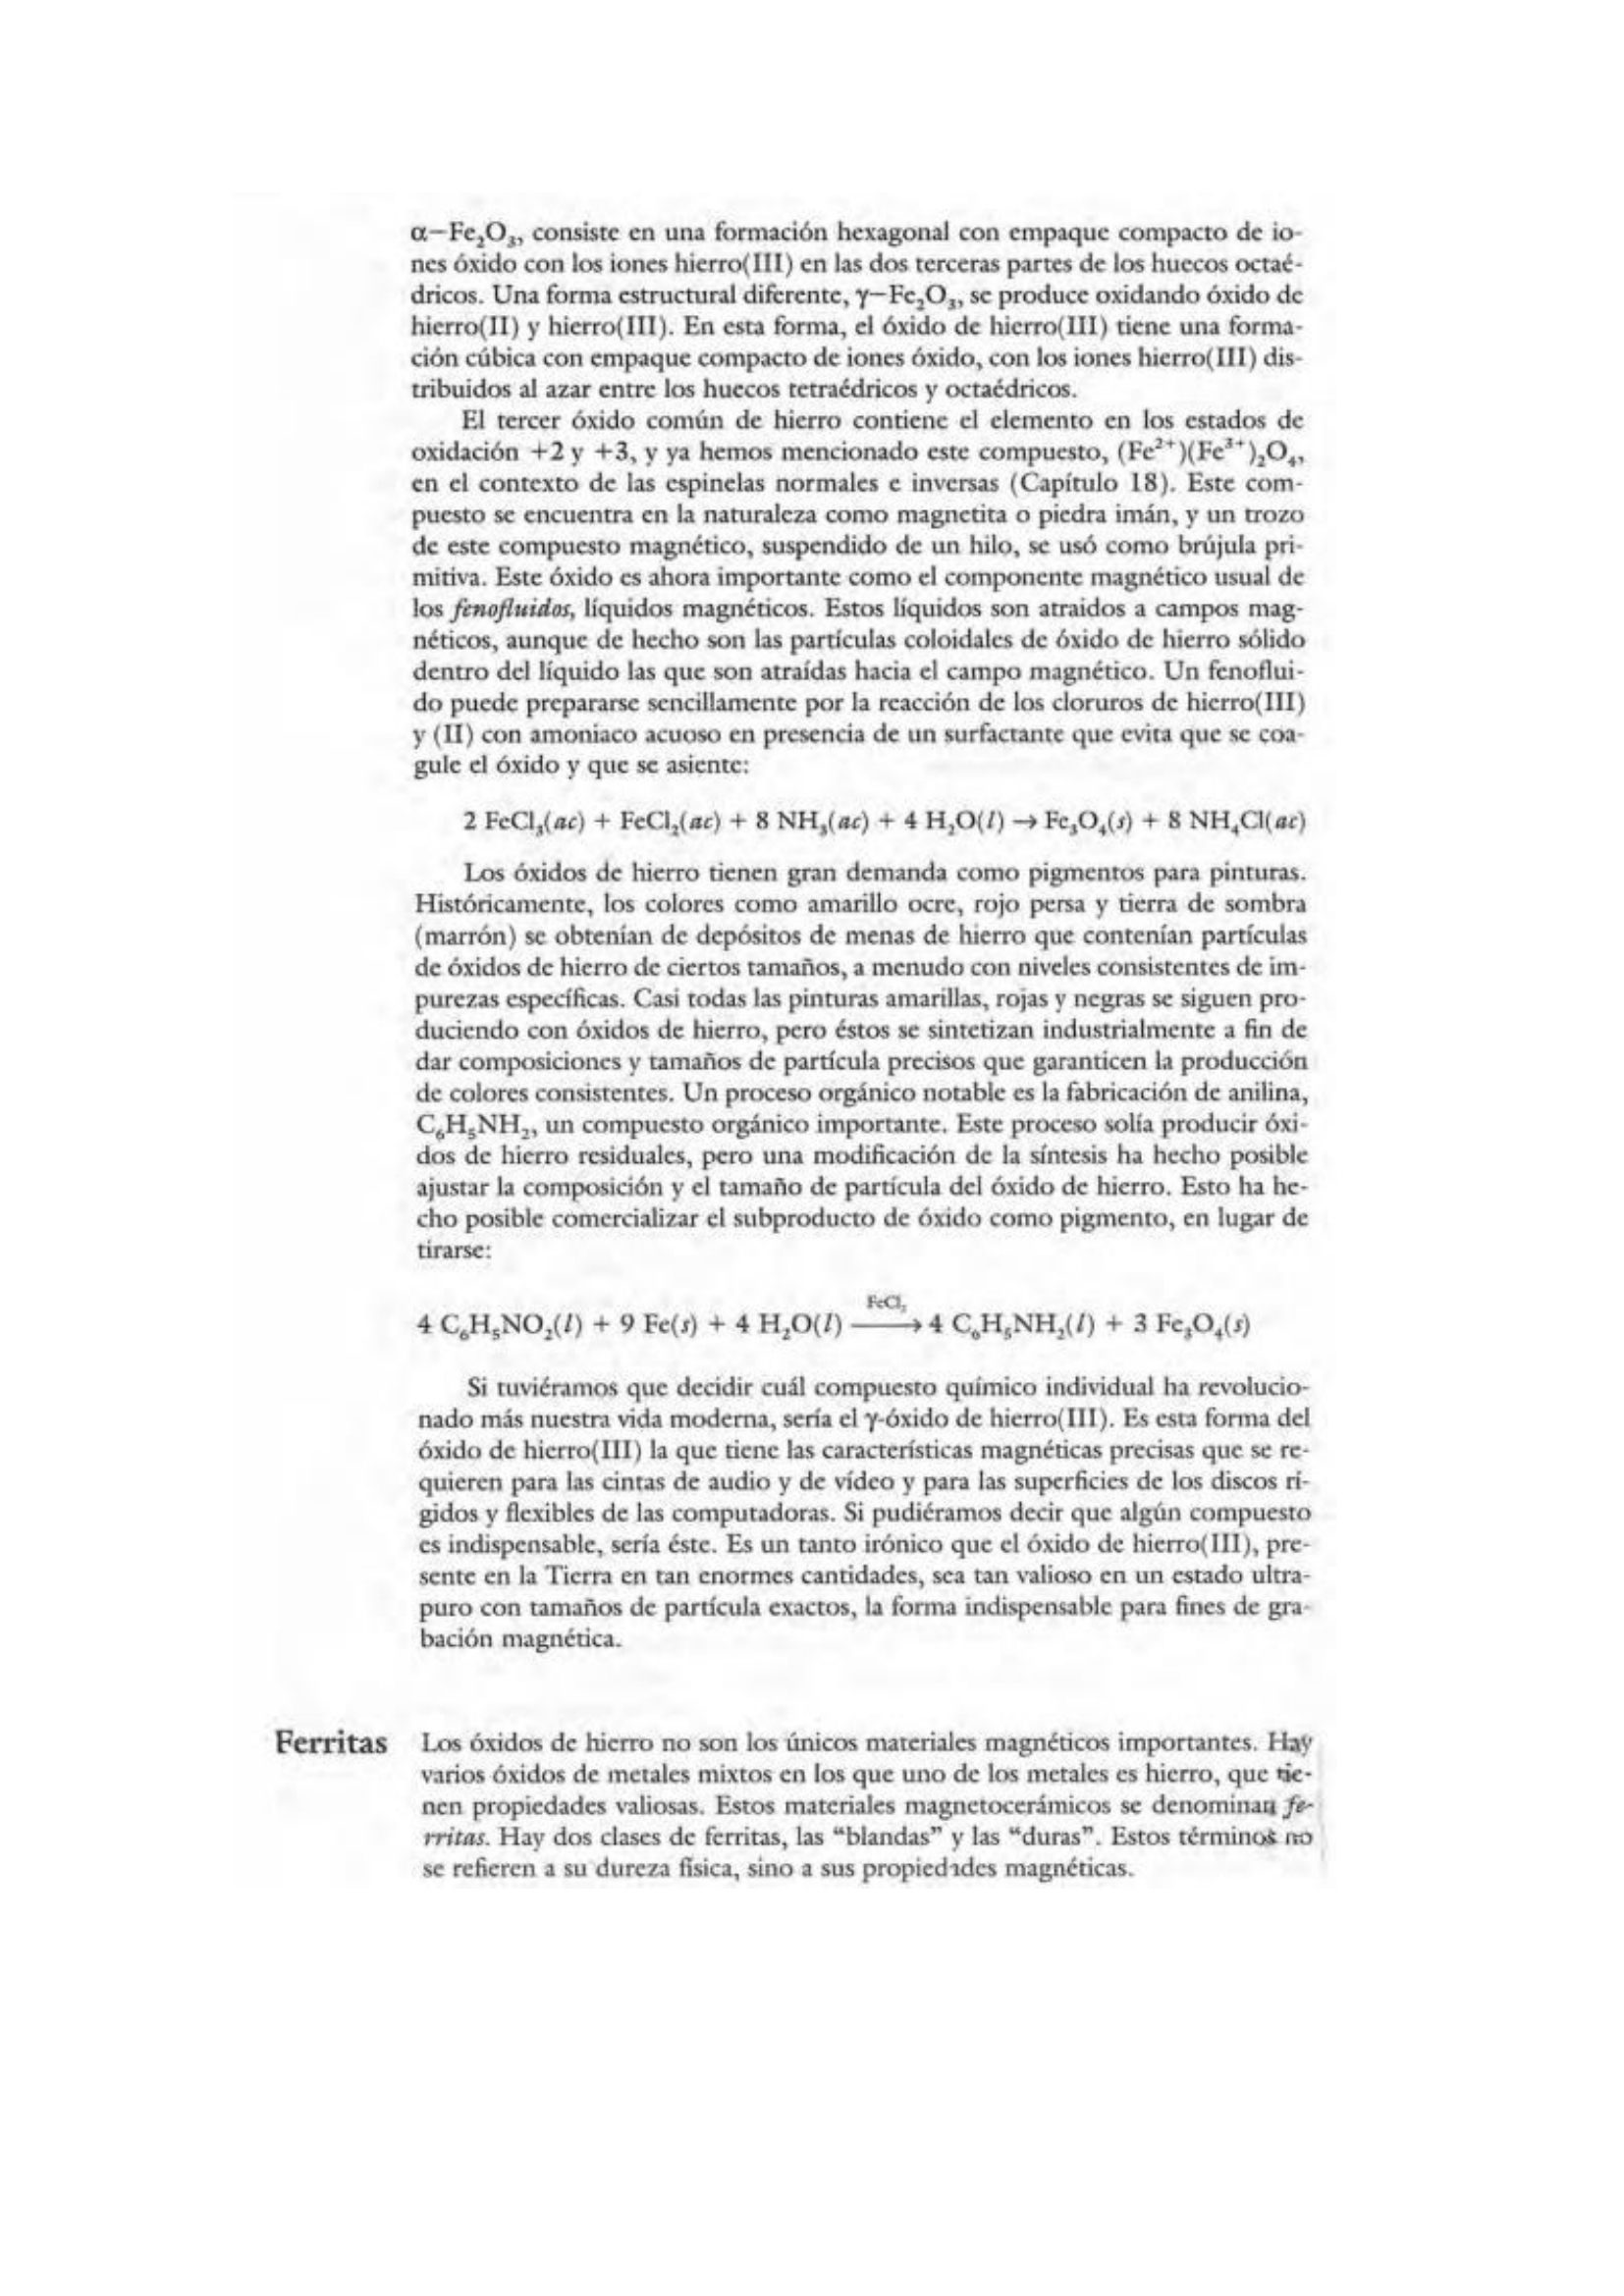

<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x16E46D6E470>
http://carlos2524.jindo.com/



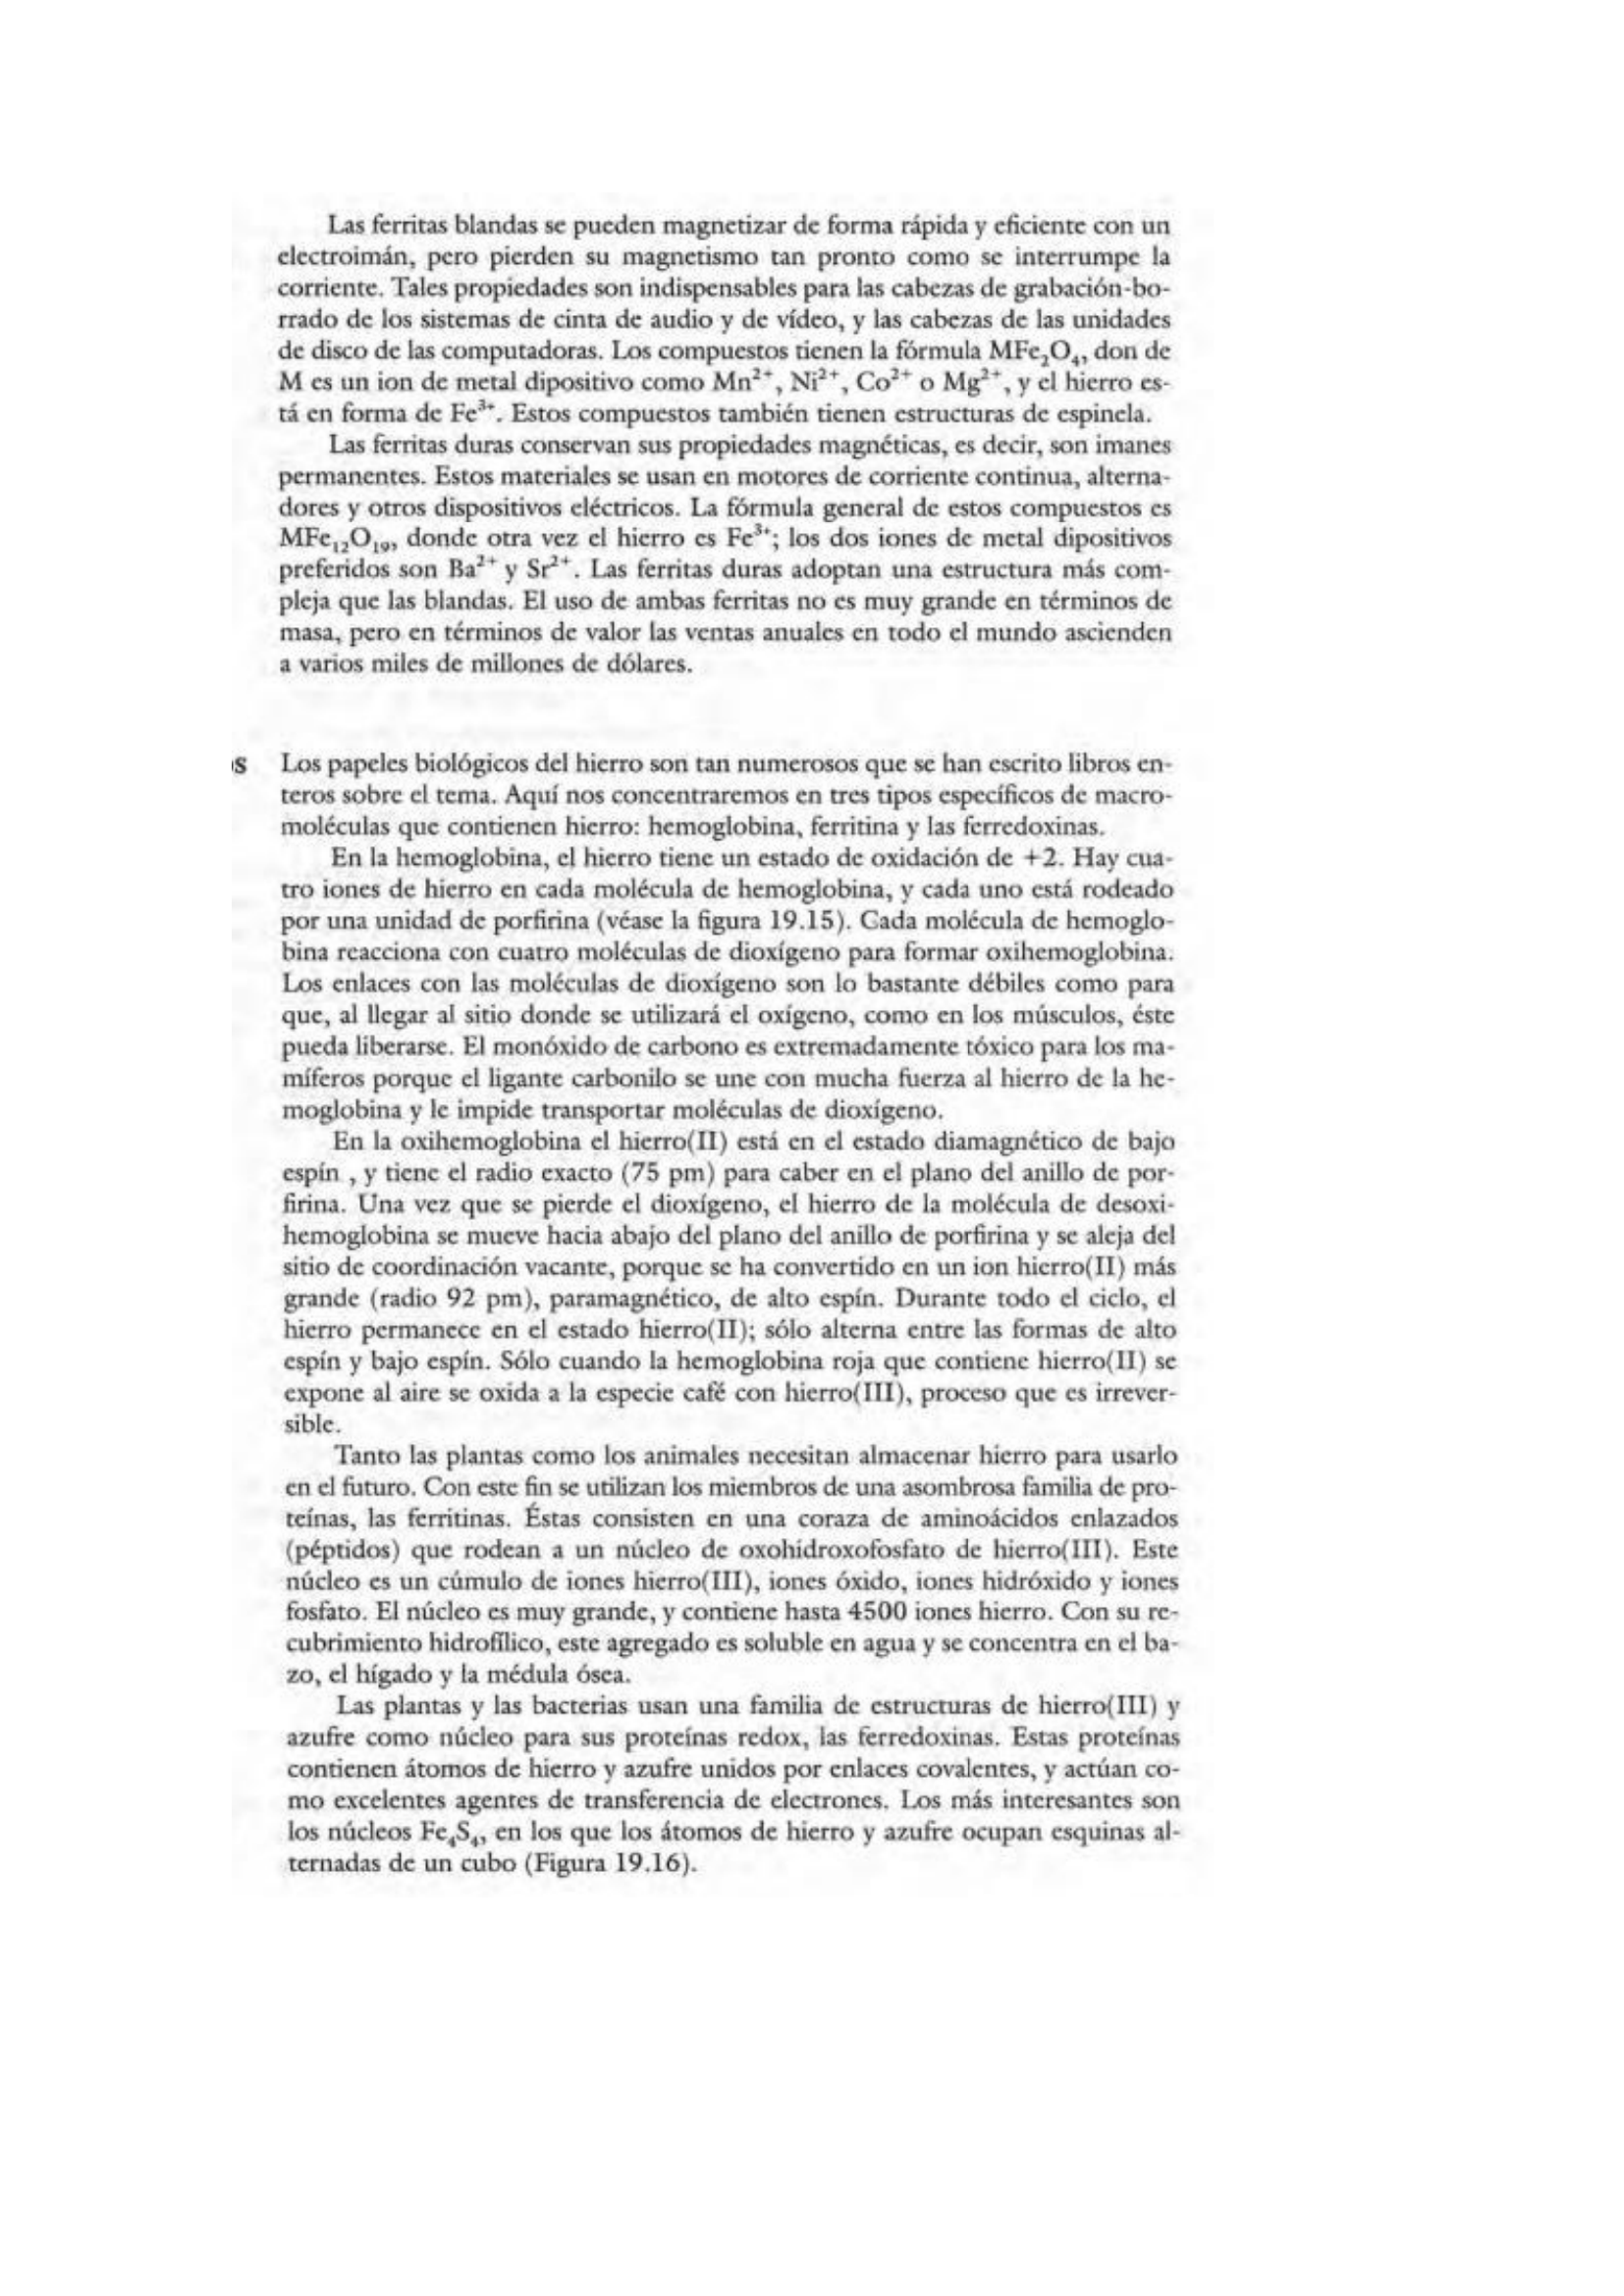

<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x16E46D6EC20>
http://carlos2524.jindo.com/



In [73]:
pdf = 'libro_2.pdf'
first_page = pdf_dict[pdf]['first_page']
last_page = pdf_dict[pdf]['last_page']
images = pdf_to_img('C:/Users/Hp/PycharmProjects/ImageToTextArgentina/data/' + pdf, first_page, last_page)
for pg, img in enumerate(images):
    display(img)
    #img = preprocess_image(img)
    #text = ocr_core(img)
    #print(pdf)
    print(img)
    print(text)


In [ ]:
for index, row in df_output.iterrows():
    filename = row['img_filename']
    ref = row['ref_text']
    output = row['ocr_output']
    cer = fastwer.score_sent(output, ref, char_level=True)
    wer = fastwer.score_sent(output, ref, char_level=False)
    df_output.loc[df_output['img_filename'] == filename, 'cer'] = round(cer,2) # Round value to 2 decimal places
    df_output.loc[df_output['img_filename'] == filename, 'wer'] = round(wer,2)

df_output

In [ ]:
# Overall performances
mean_cer = df_output['cer'].mean()
mean_wer = df_output['wer'].mean()
print(f'Mean CER = {mean_cer}%, Mean WER = {mean_wer}%')